# SPRINT 2
Analistes de Finances i Risc Crediticio: Els clients amb préstecs i hipoteques tendeixen a tenir un 
saldo mitjà més baix o més risc d'incompliment? Com hauríem d'ajustar les nostres ofertes i 
estratègies de gestió de riscos en funció d'aquestes troballes?

CATEGORICAS : LOAN / HOUSING
NUMÉRICAS : BALANCE / DEFAULT


In [1]:
from sqlalchemy import create_engine, inspect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, time, datetime
%pip install pymysql
import pymysql
#Dades de connexió

usuario='EquipoB'
contraseña="E1q2u3i4p5oB"
host='212.227.90.6'
puerto=3306
nombre_base_datos='EquipB'

#URL de la connexió
url_conexion=f"mysql+pymysql://{usuario}:{contraseña}@{host}:{puerto}/{nombre_base_datos}"

#Crear l'engine de SQLAlchemy
try:
    engine=create_engine(url_conexion)
    cnx=engine.connect()
    print("conexió correcta")
except Exception as e:
    print(f"Error al conectar con SQLAlchemy: {e}")
    
#Obtenir nom de les taules
inspector=inspect(engine)
nombre_tablas=inspector.get_table_names()


#Emmagatzemar el DataFrames en una llista
df= {}

for taula in nombre_tablas:
    query=f"select * from {taula}"
    
    try:
        df[taula] = pd.read_sql(query, cnx)
        print(f"Taula '{taula}' carregada correctament.")
    except Exception as e:
        print(f"Error al carregar la taula '{taula}':{e}")

#cnx.close()

Note: you may need to restart the kernel to use updated packages.
conexió correcta
Taula 'BANK_marketing' carregada correctament.
Taula 'BANK_marketing131024' carregada correctament.
Taula 'vista_finances' carregada correctament.


In [9]:
df_bank = df['BANK_marketing131024']

df_finanzas = df_bank[['id','age','job','marital','education','default','balance','housing','loan']]
df_finanzas.head()


,id,age,job,marital,education,default,balance,housing,loan
0,1,59.0,admin.,married,secondary,no,2343,yes,no
1,2,59.0,admin.,married,secondary,no,2343,yes,no
2,3,56.0,admin.,married,secondary,no,45,no,no
3,4,41.0,technician,married,secondary,no,1270,yes,no
4,5,55.0,services,married,secondary,no,2476,yes,no


In [10]:
df_finanzas.describe()

,id,age,balance
count,16163.000000,16150.000000,16163.000000
mean,9696.799233,41.265015,1527.209924
std,6754.310906,11.965267,3242.089071
min,1.000000,18.000000,-6847.000000
25%,4041.500000,32.000000,123.000000
50%,8082.000000,39.000000,543.000000
75%,17342.500000,49.000000,1717.000000
max,21383.000000,95.000000,81204.000000


In [11]:
df_finanzas['loan'].value_counts()

loan
no     14017
yes     2146
Name: count, dtype: int64

In [12]:
df_finanzas['loan'].isnull().sum()

0

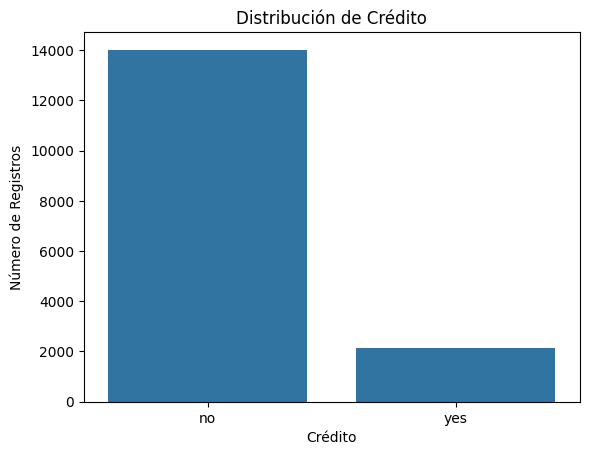

In [15]:
sns.countplot(x='loan', data= df_vistaf)
plt.title('Distribución de Crédito')
plt.xlabel('Crédito')
plt.ylabel('Número de Registros')
plt.show()


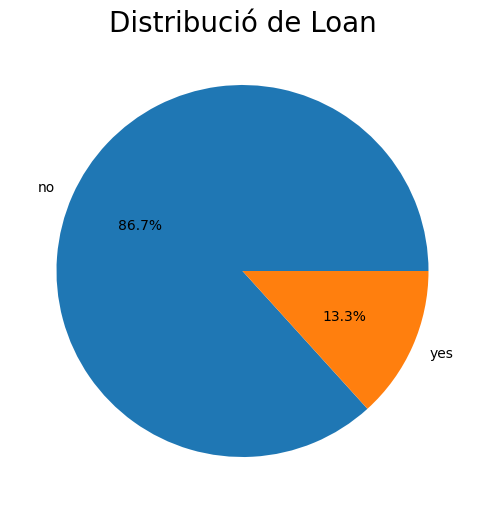

In [28]:
compteig_loan= df_finanzas['loan'].value_counts()
plt.figure(figsize=(6,6))
plt.axis('equal')
plt.pie(compteig_loan,labels=compteig_loan.index, autopct='%1.1f%%')#, wedgeprops=dict(width=0.4))
plt.title("Distribució de Crédito", fontsize=20 )
plt.show()

y seguiré viendo prestamos en funcion de saldo e incumplimiento con un par de graficos de densidad (de prestamos) con hue (de saldo y de incumplimiento) ¿Te parece?

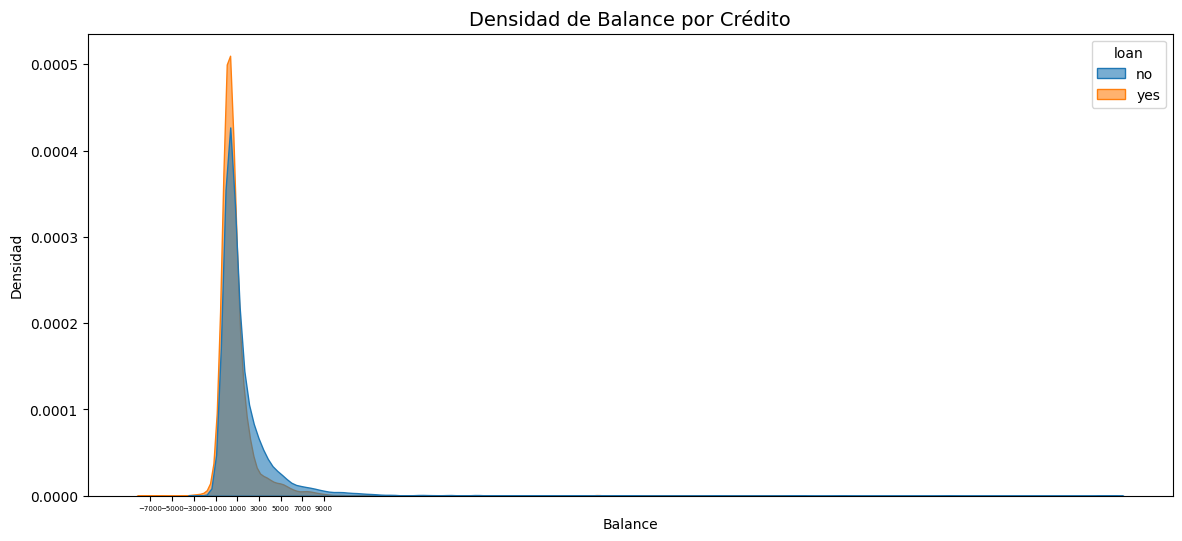

In [29]:
plt.figure(figsize=(14, 6))

sns.kdeplot(data=df_finanzas, x='balance', hue='loan', fill=True, common_norm=False, alpha=0.6)

plt.title('Densidad de Saldo segmentado por Crédito', fontsize=14)
plt.xlabel('Balance')
plt.ylabel('Densidad')

plt.xticks(range(-7000,10000,2000), fontsize=5)

plt.show()

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

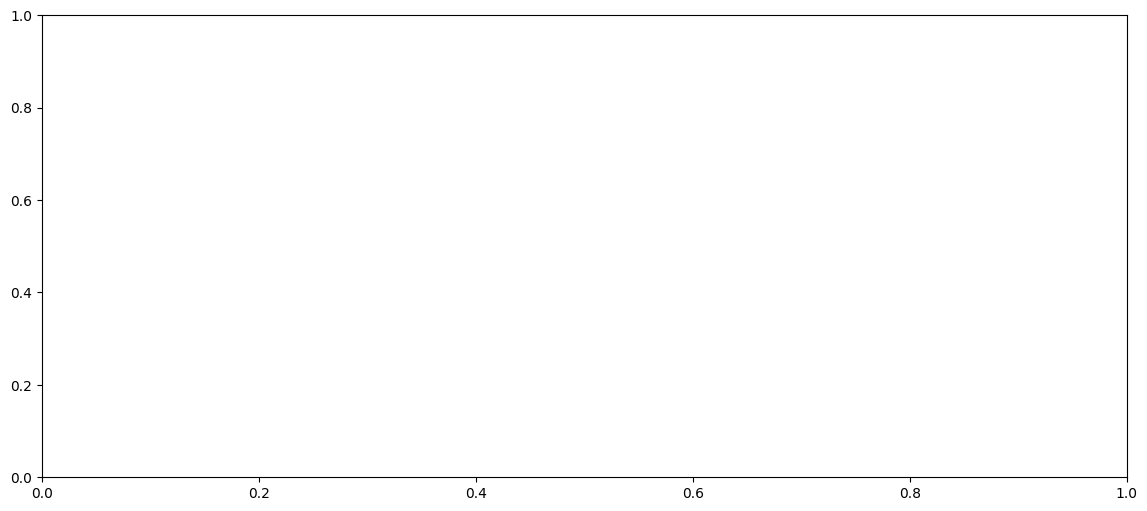

In [ ]:
#df_vistaf['faltante']= df_vistaf['faltante'].replace({"no":0,"si":1})